# Prediction Using Unsupervised ML ( Level - Beginner) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('iris.csv')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
features = data.iloc[: , :-1].values

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(init='k-means++' , n_clusters = i , random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

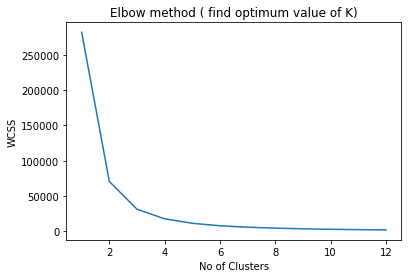

In [11]:
plt.plot(range(1,13) , wcss)
plt.title('Elbow method ( find optimum value of K)')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(init='k-means++' , n_clusters = 3 ,random_state = 0)
kmeans.fit(features)
prediction = kmeans.predict(features)

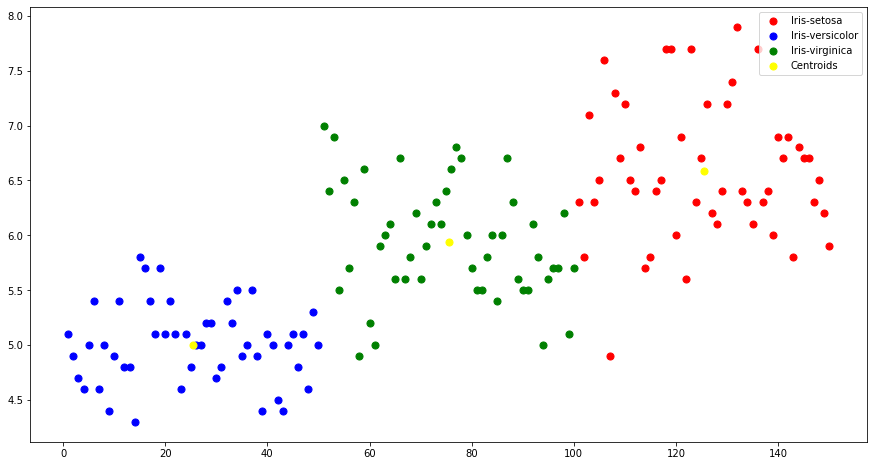

In [14]:
plt.figure(figsize=(15,8))

plt.scatter(features[prediction==0,0], features[prediction==0,1], c="red", s=50, label="Iris-setosa")
plt.scatter(features[prediction==1,0], features[prediction==1,1], c="blue", s=50, label="Iris-versicolor")
plt.scatter(features[prediction==2,0], features[prediction==2,1], c="green", s=50, label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="yellow", 
            s=50, label="Centroids")

plt.legend()